In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import plotly.express as px

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
data_desc = pd.read_csv('../data/data_description.csv', encoding='latin-1')
df = pd.read_csv('../data/investigation_train_large_checked.csv')
df_synth = pd.read_csv('../data/synth_data_for_training.csv')

In [4]:
# figures = []
# for column in df.columns:
#     fig = px.histogram(df, x=column, title=f"Distribution of {column}", nbins=30)
#     fig.show()

In [5]:
# Compute the correlation matrix
corr_matrix = df.corr()

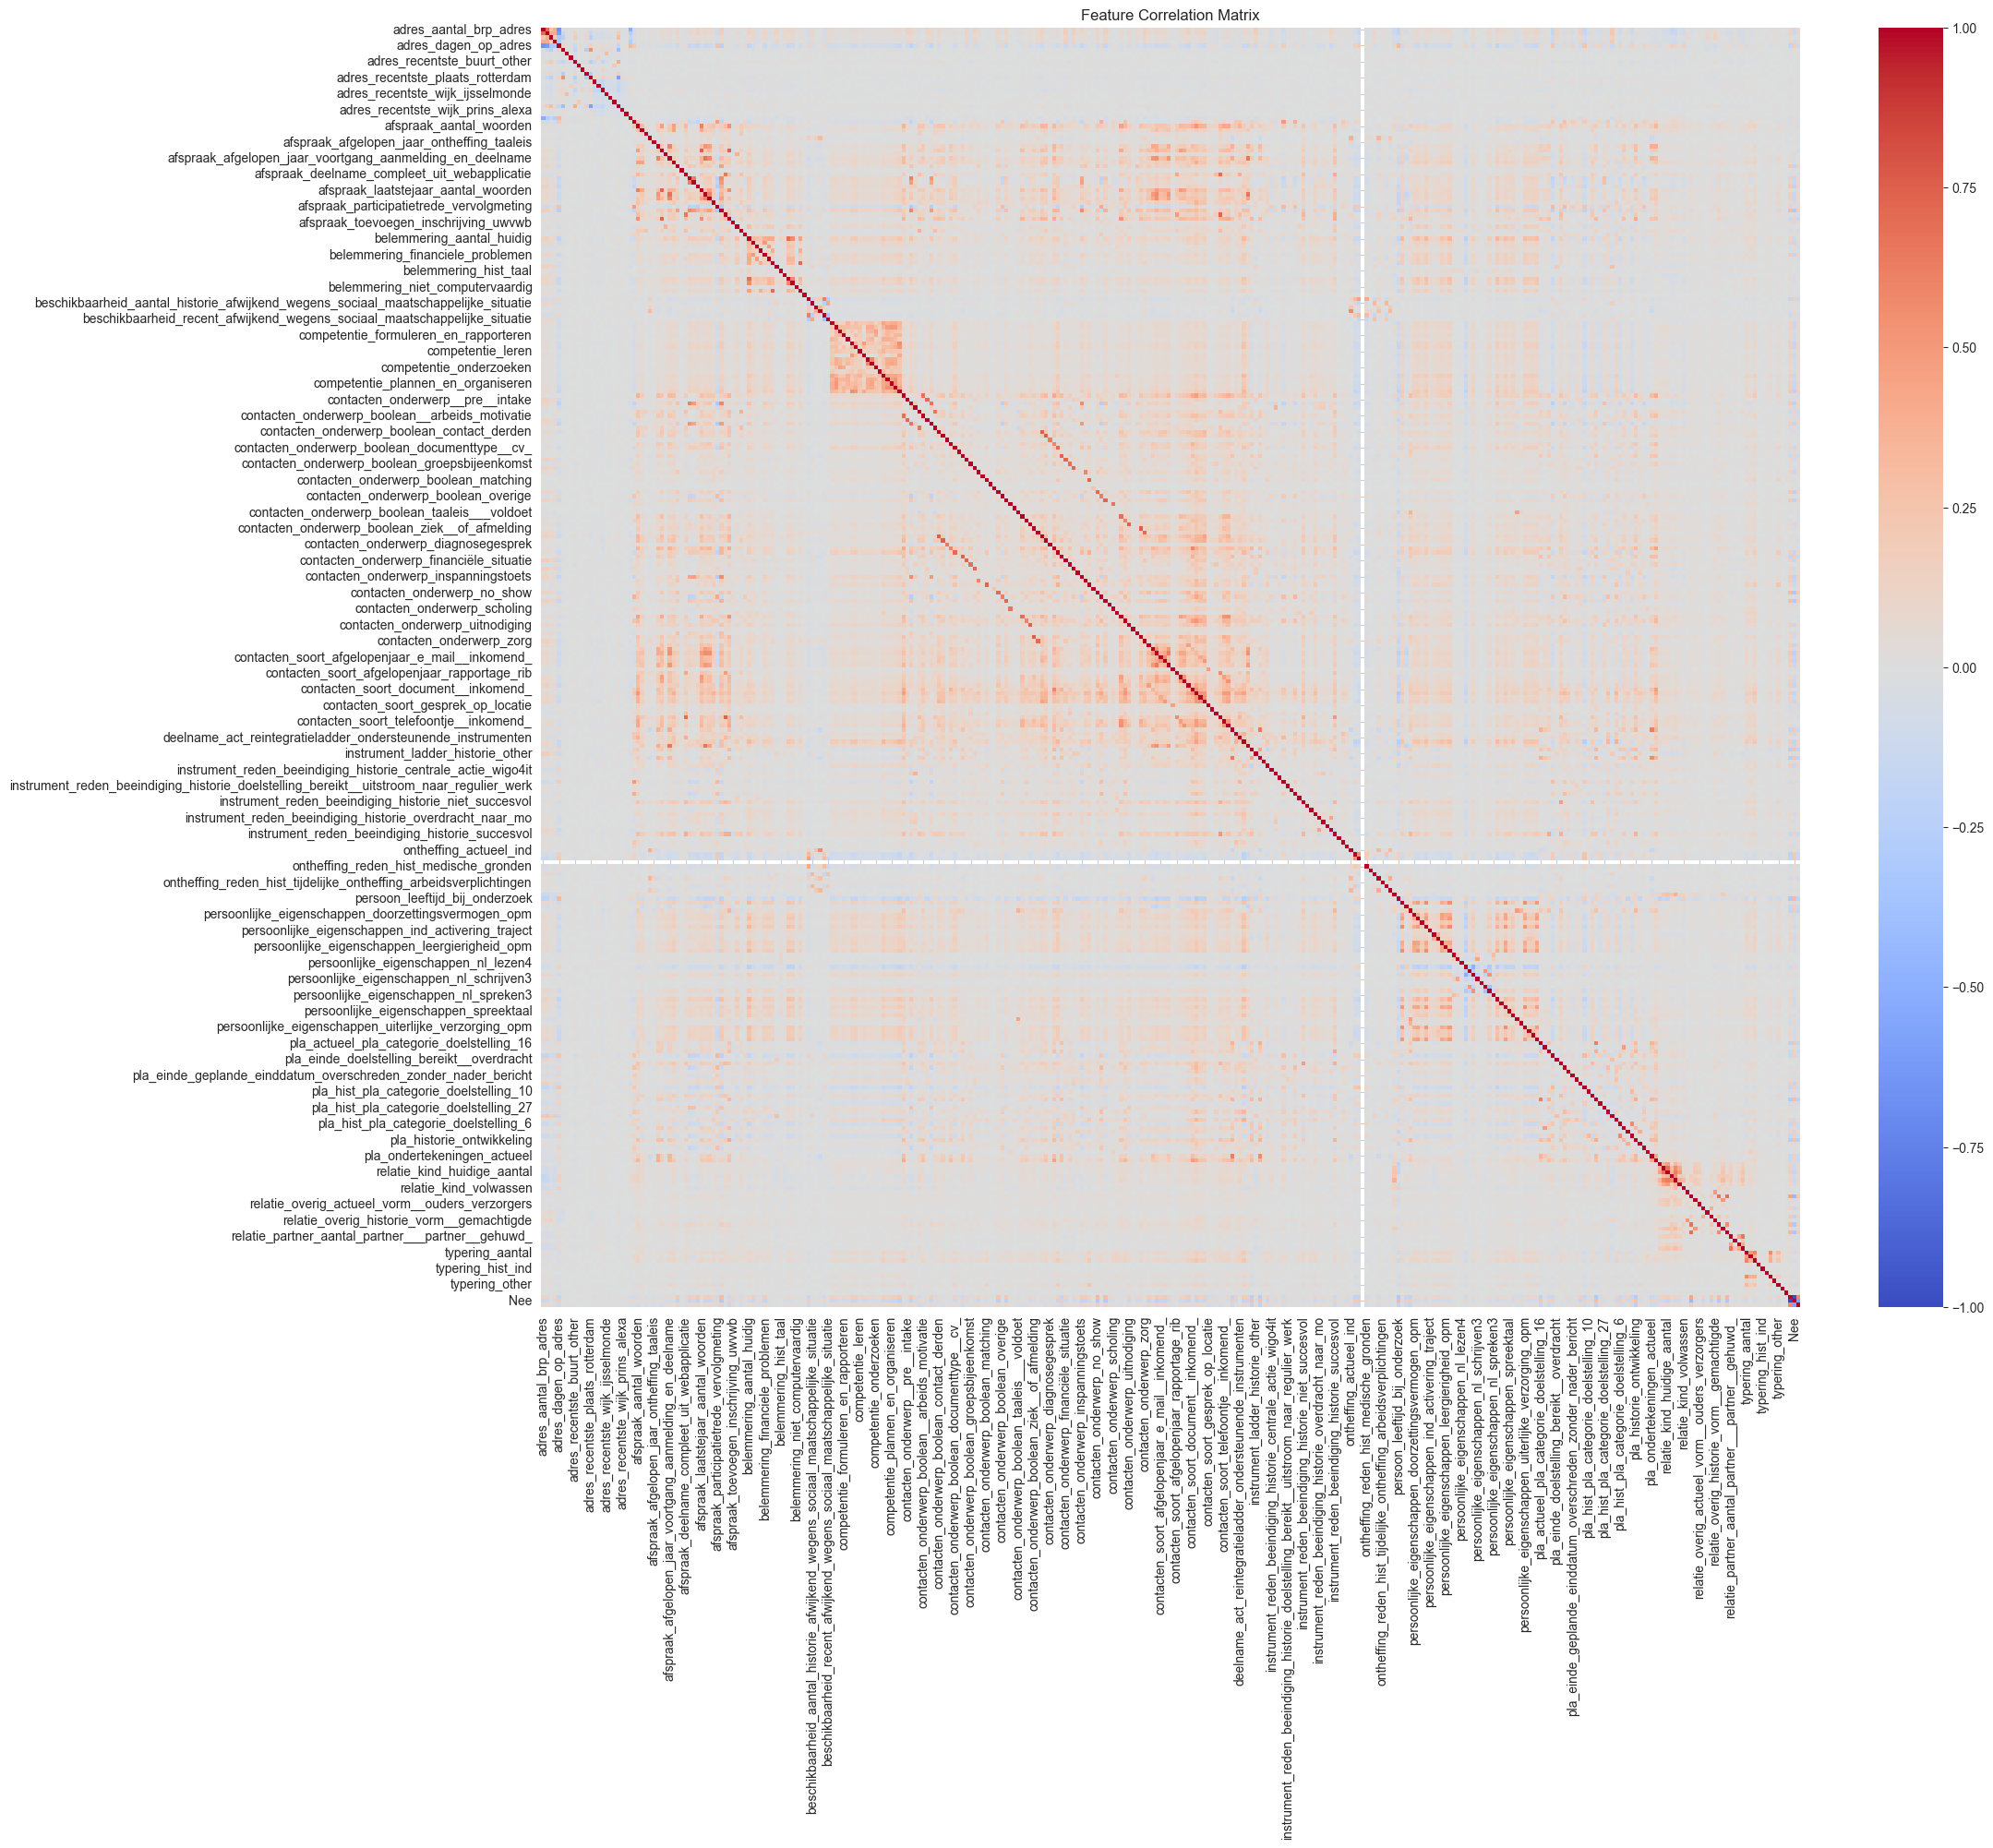

In [6]:

# Plot the correlation matrix
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()

In [7]:

# Identify highly correlated features (threshold: 0.9)
threshold = 0.5
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [
    (df.columns[i], df.columns[j])
    for i, j in zip(*high_corr_pairs) if i != j and i < j
]

# Display highly correlated feature pairs
if high_corr_pairs:
    print("Highly correlated feature pairs (threshold > 0.9):")
    for pair in high_corr_pairs:
        print(pair)
else:
    print("No highly correlated feature pairs found.")



Highly correlated feature pairs (threshold > 0.9):
('adres_aantal_brp_adres', 'adres_aantal_verschillende_wijken')
('adres_aantal_brp_adres', 'adres_dagen_op_adres')
('adres_aantal_brp_adres', 'adres_unieke_wijk_ratio')
('adres_aantal_verschillende_wijken', 'adres_dagen_op_adres')
('adres_recentst_onderdeel_rdam', 'adres_recentste_plaats_rotterdam')
('adres_recentste_plaats_rotterdam', 'adres_recentste_wijk_other')
('afspraak_aanmelding_afgesloten', 'instrument_reden_beeindiging_historie_doelstelling_bereikt__geen_uitstroom')
('afspraak_aantal_woorden', 'afspraak_laatstejaar_aantal_woorden')
('afspraak_aantal_woorden', 'afspraak_signaal_voor_medewerker')
('afspraak_aantal_woorden', 'contacten_soort_document__uitgaand_')
('afspraak_afgelopen_jaar_plan_van_aanpak', 'afspraak_afgelopen_jaar_voortgang_aanmelding_en_deelname')
('afspraak_afgelopen_jaar_plan_van_aanpak', 'afspraak_laatstejaar_resultaat_ingevuld')
('afspraak_afgelopen_jaar_signaal_voor_medewerker', 'afspraak_laatstejaar_aanta

In [8]:
features = [f for f in df.columns if 'taal' in f]

for feature in features:
    # Compute correlation of 'checked' with every other column
    checked_correlations = corr_matrix[feature].drop(feature)  # Exclude self-correlation

    checked_correlations = checked_correlations.sort_values(ascending=False)
    # Display the correlation values
    print("-----------------------------------------------")
    print("Correlations of " + feature + " with other columns:")
    print(checked_correlations[:10])

else:
    print("'checked' column not found in the dataset.")

-----------------------------------------------
Correlations of afspraak_afgelopen_jaar_monitoring_insp__wet_taaleis_na_12_mnd_n_a_v__taa04_____geen_maatregel with other columns:
afspraak_verzenden_beschikking_i_v_m__niet_voldoen_aan_wet_taaleis    0.254710
contacten_onderwerp_beoordelen_taaleis                                0.171343
contacten_onderwerp_boolean_beoordelen_taaleis                        0.129007
contacten_soort_rapportage_rib                                        0.128013
afspraak_other                                                        0.112424
afspraak_deelname_compleet_uit_webapplicatie                          0.110831
afspraak_laatstejaar_aantal_woorden                                   0.098447
afspraak_afgelopen_jaar_afsprakenplan                                 0.095959
instrument_reden_beeindiging_historie_succesvol                       0.091348
contacten_onderwerp_contact_met_aanbieder                             0.090582
Name: afspraak_afgelopen_jaar_m

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select features containing 'persoonlijk' in the name
persoonlijk_features = [col for col in df.columns if 'persoon' in col]

# Subset the dataframe to include only these features
persoonlijk_df = df[persoonlijk_features]

# Drop rows with missing values, as VIF cannot handle them
persoonlijk_df = persoonlijk_df.dropna()

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = persoonlijk_df.columns
vif_data['VIF'] = [
    variance_inflation_factor(persoonlijk_df.values, i) for i in range(persoonlijk_df.shape[1])
]

# Display the VIF values
print(vif_data)


                                              Feature       VIF
0                              persoon_geslacht_vrouw  1.954459
1                      persoon_leeftijd_bij_onderzoek  8.299453
2         persoonlijke_eigenschappen_communicatie_opm  4.106984
3       persoonlijke_eigenschappen_dagen_sinds_opvoer  3.026866
4      persoonlijke_eigenschappen_dagen_sinds_taaleis  4.821517
5   persoonlijke_eigenschappen_doorzettingsvermoge...  2.887949
6        persoonlijke_eigenschappen_flexibiliteit_opm  3.455398
7            persoonlijke_eigenschappen_hobbies_sport  1.873764
8              persoonlijke_eigenschappen_houding_opm  3.987491
9   persoonlijke_eigenschappen_ind_activering_traject  1.207764
10  persoonlijke_eigenschappen_ind_buiten_kantoort...  1.405729
11  persoonlijke_eigenschappen_ind_regulier_arbeid...  1.685911
12          persoonlijke_eigenschappen_initiatief_opm  3.020784
13      persoonlijke_eigenschappen_leergierigheid_opm  2.628001
14           persoonlijke_eigenschappen_